Hapus Folder

In [ ]:
!rm -rf /tmp/rockpaperscissors

Mulai

In [ ]:
import tensorflow as tf
print(tf.__version__)
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

2.5.0
--2021-06-01 04:01:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z  73%[=============>      ] 227.17M   987KB/s    in 3m 29s  

2021-06-01 04:04:53 (1.09 MB/s) - Read error at byte 238206976/322873683 (Connection reset by peer). Retrying.

--2021-06-01 04:04:54--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683

In [ ]:
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

**SPLITING DATASET TO TRAIN AND VALIDATION**

TRAINING

In [ ]:
import zipfile,os

In [ ]:
base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rocks = os.path.join(base_dir,'rock')
papers = os.path.join(base_dir, 'paper')
scissor = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
trock = os.path.join(train_dir, 'rock')
tpaper = os.path.join(train_dir, 'paper')
tscissor = os.path.join(train_dir, 'scissors')
hasil_rock = os.path.join(validation_dir, 'rock')
hasil_paper = os.path.join(validation_dir, 'paper')
hasil_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(trock)
os.mkdir(tpaper)
os.mkdir(tscissor)
os.mkdir(hasil_rock)
os.mkdir(hasil_paper)
os.mkdir(hasil_scissors)

VALIDATION

In [ ]:
from sklearn.model_selection import train_test_split
trock_dir, hasil_rock_dir = train_test_split(os.listdir(rocks), test_size = 0.40)
tpaper_dir, hasil_paper_dir = train_test_split(os.listdir(papers), test_size = 0.40)
tscissors_dir, hasil_scissors_dir = train_test_split(os.listdir(scissor), test_size = 0.40)

In [ ]:
import shutil

Separate

In [ ]:
for file in trock_dir:
  shutil.copy(os.path.join(rocks, file), os.path.join(trock, file))
for file in tpaper_dir:
  shutil.copy(os.path.join(papers, file), os.path.join(tpaper, file))
for file in tscissors_dir:
  shutil.copy(os.path.join(scissor, file), os.path.join(tscissor, file))

In [ ]:
for file in hasil_rock_dir:
  shutil.copy(os.path.join(rocks, file), os.path.join(hasil_rock, file))
for file in hasil_paper_dir:
  shutil.copy(os.path.join(papers, file), os.path.join(hasil_paper,file))
for file in hasil_scissors_dir:
  shutil.copy(os.path.join(scissor, file), os.path.join(hasil_scissors, file))

AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
traindt = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
testdt = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
traingen = traindt.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical' 
)

validgen = testdt.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

TRAIN MODEL #total average time are 26 mins 

In [ ]:
lat = model.fit(
    traingen,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validgen,
    validation_steps = 27,
    verbose = 1
)

Epoch 1/20
41/41 [==============================] - 80s 2s/step - loss: 1.0842 - accuracy: 0.5290 - val_loss: 0.6479 - val_accuracy: 0.7616
Epoch 2/20
41/41 [==============================] - 78s 2s/step - loss: 0.4734 - accuracy: 0.8285 - val_loss: 0.3527 - val_accuracy: 0.8611
Epoch 3/20
41/41 [==============================] - 78s 2s/step - loss: 0.2899 - accuracy: 0.8971 - val_loss: 0.2832 - val_accuracy: 0.9005
Epoch 4/20
41/41 [==============================] - 78s 2s/step - loss: 0.2371 - accuracy: 0.9085 - val_loss: 0.2580 - val_accuracy: 0.9132
Epoch 5/20
41/41 [==============================] - 78s 2s/step - loss: 0.2154 - accuracy: 0.9230 - val_loss: 0.2249 - val_accuracy: 0.9236
Epoch 6/20
41/41 [==============================] - 78s 2s/step - loss: 0.1673 - accuracy: 0.9444 - val_loss: 0.1957 - val_accuracy: 0.9329
Epoch 7/20
41/41 [==============================] - 78s 2s/step - loss: 0.1566 - accuracy: 0.9383 - val_loss: 0.1658 - val_accuracy: 0.9398
Epoch 8/20
41/41 [==

Grafik

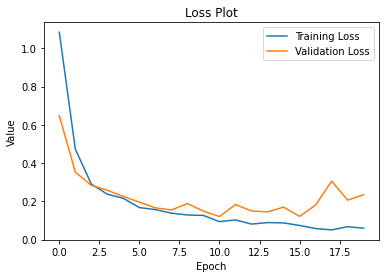

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(lat.history['loss'], label='Training Loss')
plt.plot(lat.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc="upper right")
plt.show()

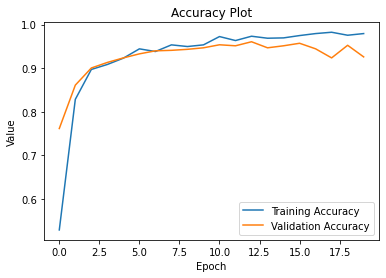

In [ ]:
#accuracy train & validation
plt.plot(lat.history['accuracy'], label='Training Accuracy')
plt.plot(lat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc="lower right")
plt.show()

Hasil Prediksi

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
scissors


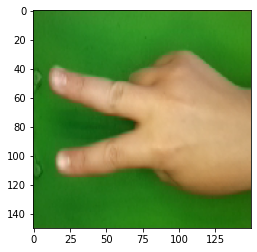

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Hanfrey Djaya W